# Лабораторная работа №4

Вариант: 9 [Датасет про диабет](https://www.kaggle.com/datasets/abdallamahgoub/diabetes/data)

Импортируем необходимые библиотеки

In [1]:
import random
from itertools import combinations

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

pd.options.mode.chained_assignment = None
import warnings

warnings.simplefilter(action='ignore', category=FutureWarning)

Для начала загрузим датасет и выведем его

In [2]:
df = pd.read_csv("./data/diabetes.xls")
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Pedigree,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


Рассчитаем основные статистические показатели по данным

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Pregnancies    768 non-null    int64  
 1   Glucose        768 non-null    int64  
 2   BloodPressure  768 non-null    int64  
 3   SkinThickness  768 non-null    int64  
 4   Insulin        768 non-null    int64  
 5   BMI            768 non-null    float64
 6   Pedigree       768 non-null    float64
 7   Age            768 non-null    int64  
 8   Outcome        768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Pedigree,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


array([[<Axes: title={'center': 'Pregnancies'}>,
        <Axes: title={'center': 'Glucose'}>,
        <Axes: title={'center': 'BloodPressure'}>],
       [<Axes: title={'center': 'SkinThickness'}>,
        <Axes: title={'center': 'Insulin'}>,
        <Axes: title={'center': 'BMI'}>],
       [<Axes: title={'center': 'Pedigree'}>,
        <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Outcome'}>]], dtype=object)

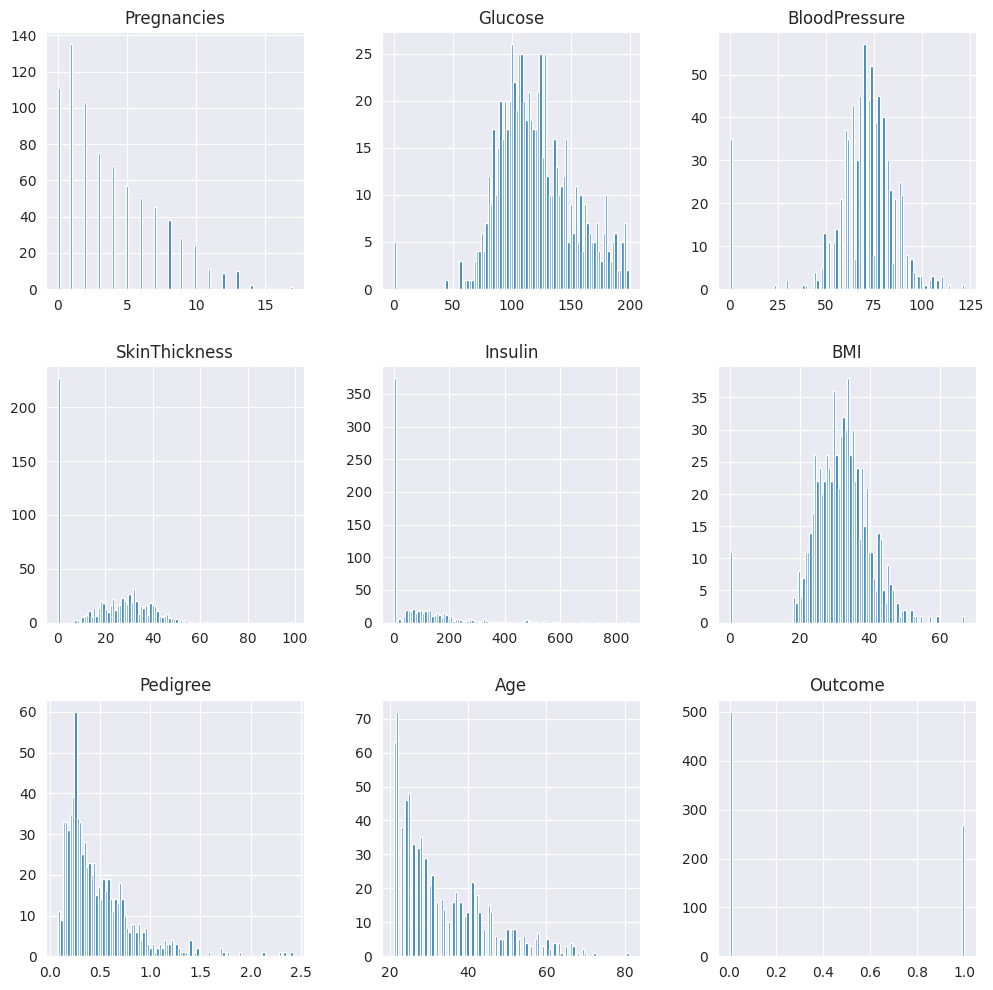

In [5]:
df.hist(bins=100, figsize=(12, 12))

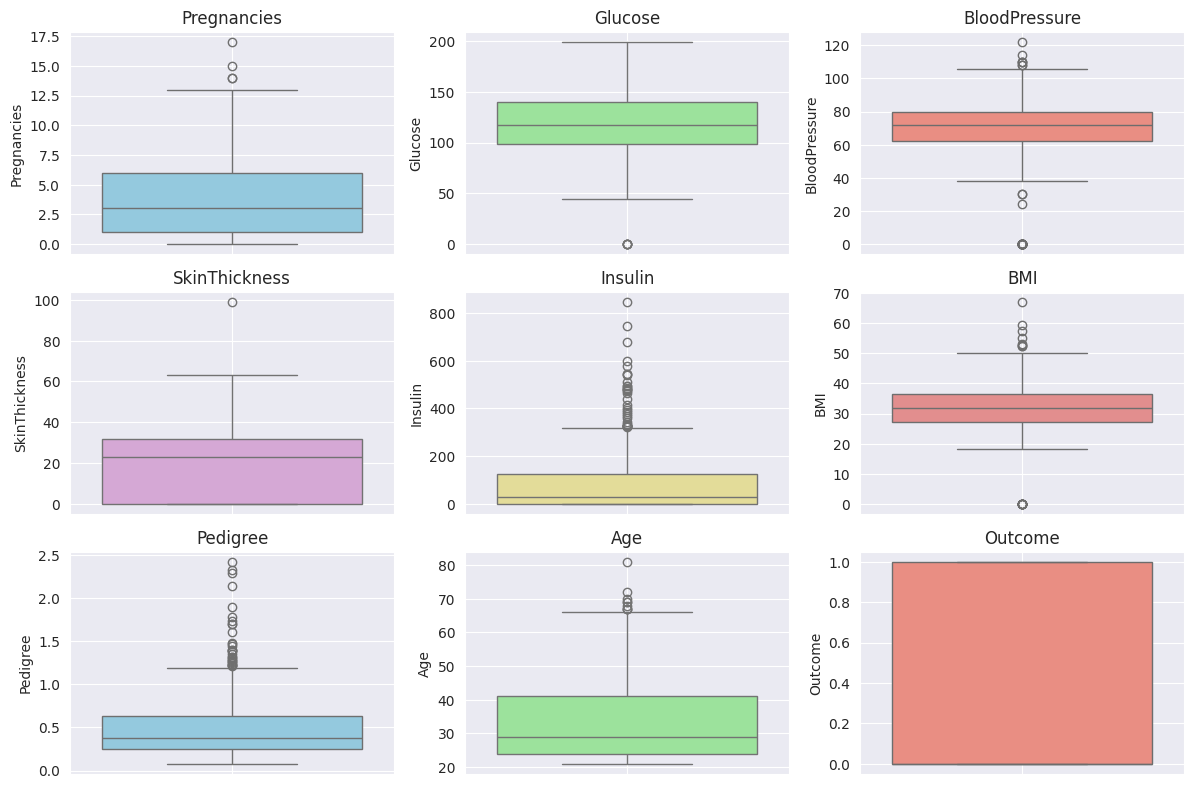

In [6]:
num_cols = len(df.columns)
cols_per_row = 3

fig, axes = plt.subplots(3, cols_per_row, figsize=(12, 8))
axes = axes.flatten() if num_cols > 1 else [axes]

colors = ["skyblue", "lightgreen", "salmon", "plum", "khaki", "lightcoral"]

for i, col in enumerate(list(df.columns)):
    sns.boxplot(y=df[col], ax=axes[i], color=colors[i % len(colors)])
    axes[i].set_title(col)
    axes[i].grid(True)

plt.tight_layout()
plt.show()

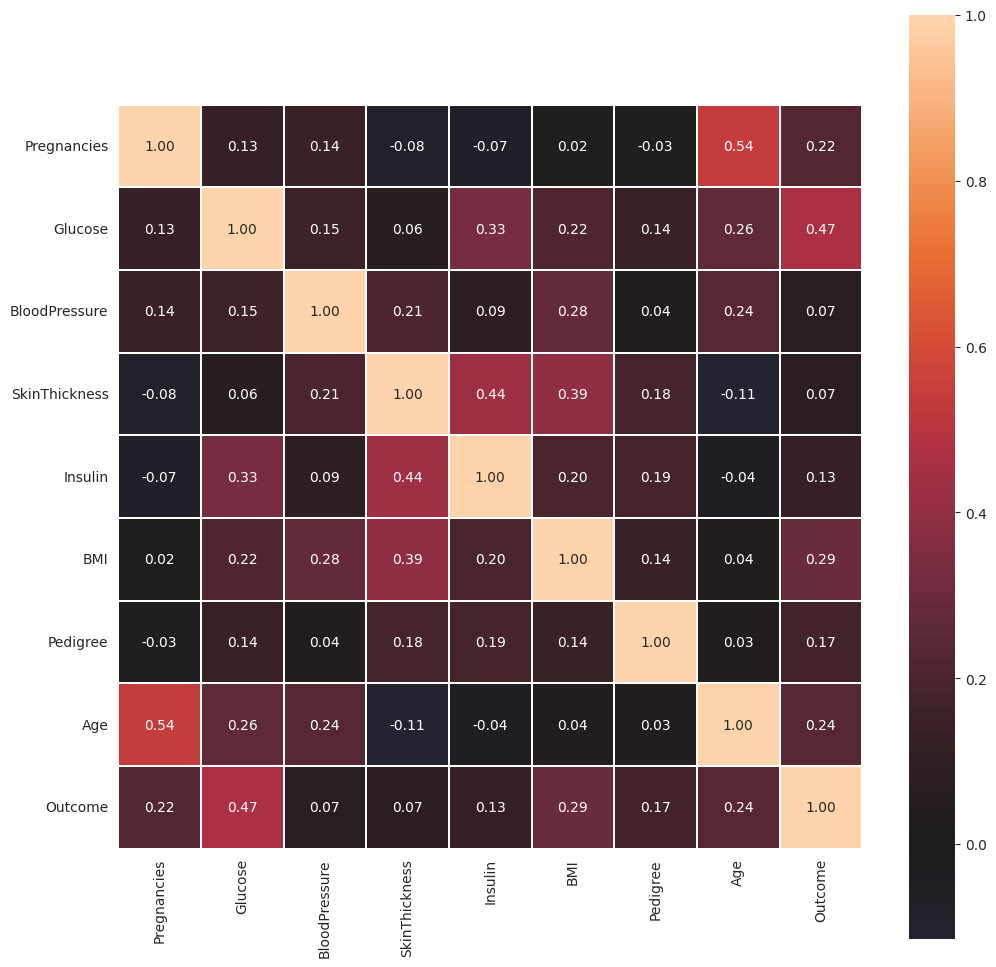

In [7]:
plt.figure(figsize=(12, 12))
sns.heatmap(df.corr(), annot=True, fmt=".2f", center=0,
            square=True, linewidths=0.1)
plt.show()

Проанализируем теперь датасет на наличие пропущенных значений

In [8]:
print(df.isnull().sum())

Pregnancies      0
Glucose          0
BloodPressure    0
SkinThickness    0
Insulin          0
BMI              0
Pedigree         0
Age              0
Outcome          0
dtype: int64


Пропущенных значений нет, следовательно заполнять их не нужно

Теперь нормализуем данные с помощью min-max нормализации:

$$
x_{norm} = \frac{x-x_{min}}{x_{max}-x_{min}}
$$

In [9]:
n_df = df.copy()

for col in df:
    min_v = df[col].min()
    max_v = df[col].max()
    if min_v == max_v:
        continue
    n_df[col] = (df[col] - min_v) / (max_v - min_v)

n_df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Pedigree,Age,Outcome
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,0.483333,1.0
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,0.166667,0.0
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,0.183333,1.0
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,0.000000,0.0
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,0.200000,1.0
...,...,...,...,...,...,...,...,...,...
763,0.588235,0.507538,0.622951,0.484848,0.212766,0.490313,0.039710,0.700000,0.0
764,0.117647,0.613065,0.573770,0.272727,0.000000,0.548435,0.111870,0.100000,0.0
765,0.294118,0.608040,0.590164,0.232323,0.132388,0.390462,0.071307,0.150000,0.0
766,0.058824,0.633166,0.491803,0.000000,0.000000,0.448584,0.115713,0.433333,1.0


Построим 3d визуализацию признаков

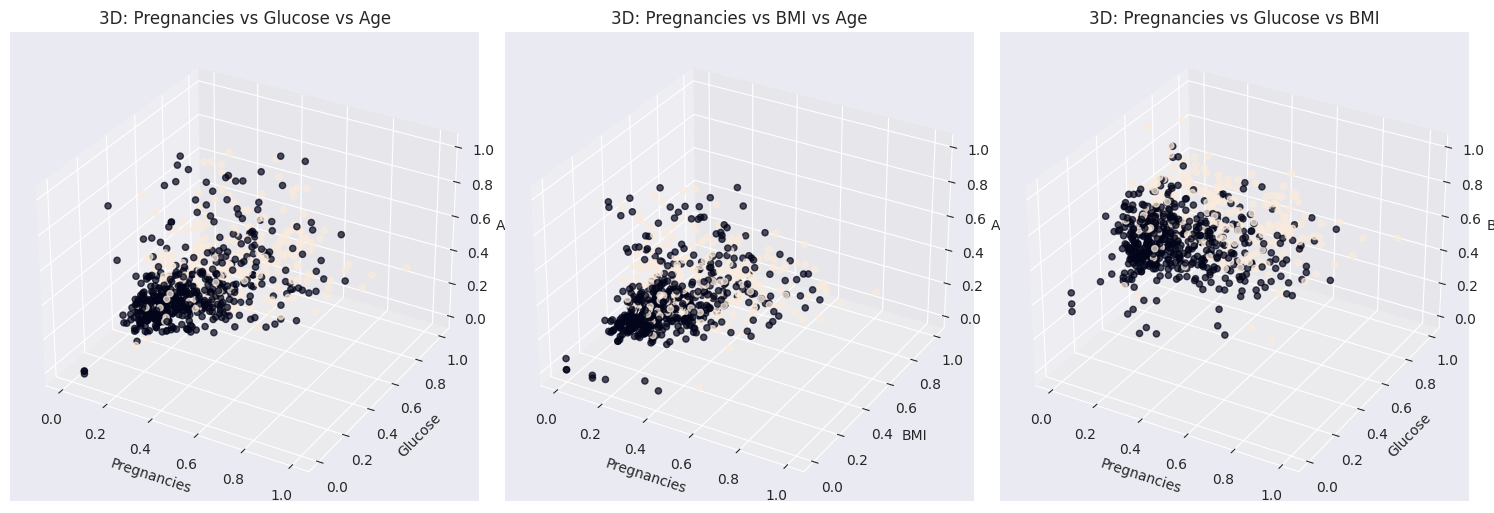

In [10]:
def plot_3d(features_combinations, df, target_col):
    subplot_cols = 3
    num_combinations = len(features_combinations)
    subplot_rows = (num_combinations + subplot_cols - 1) // subplot_cols

    fig = plt.figure(figsize=(subplot_cols * 5, subplot_rows * 5))

    for i, combo in enumerate(features_combinations):
        X_subset = df[list(combo)].values
        y_values = df['Outcome'].values

        ax = fig.add_subplot(subplot_rows, subplot_cols, i + 1, projection="3d")

        scatter = ax.scatter(X_subset[:, 0], X_subset[:, 1], X_subset[:, 2], c=y_values, alpha=0.7)
        ax.set_xlabel(combo[0])
        ax.set_ylabel(combo[1])
        ax.set_zlabel(combo[2])
        ax.set_title(f"3D: {combo[0]} vs {combo[1]} vs {combo[2]}")

    for j in range(i + 1, subplot_rows * subplot_cols):
        fig.delaxes(fig.axes[j])

    plt.tight_layout()
    plt.show()


feat_comb = [
    ['Pregnancies', 'Glucose', 'Age'],
    ['Pregnancies', 'BMI', 'Age'],
    ['Pregnancies', 'Glucose', 'BMI']
]

plot_3d(feat_comb, n_df, 'Outcome')

Выделим из общего массива данных матрицу признаков и целевую колонку

In [11]:
X = n_df.drop('Outcome', axis=1)
Y = n_df['Outcome']

Реализуем функцию для разделения данных на тренировочную и тестовую выборки

In [12]:
def train_test_split(X, Y, seed=42, test_percent=0.2):
    random.seed(seed)
    random.shuffle(list(range(len(X))))

    test_size = int(len(X) * test_percent)

    x_train = X[test_size:]
    x_test = X[:test_size]
    y_train = Y[test_size:]
    y_test = Y[:test_size]

    return x_train, x_test, y_train, y_test

Реализуем метод k ближайших соседей

In [13]:
def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2) ** 2))


def k_nearest_neighbors(X, y, query_point, k):
    distances = [euclidean_distance(query_point, x) for x in X]

    k_indices = np.argsort(distances)[:k]
    k_nearest_labels = np.array([y[i] for i in k_indices]).astype(int)
    most_common = np.bincount(k_nearest_labels).argmax()

    return most_common

Также определим вспомогательные функции для оценки качества модели. Будем использовать матрицу ошибок. Также определим стандартную accuracy метрику.

In [14]:
def error_matrix(y_pred, y_test, n):
    res = np.zeros((n, n))
    for pred, true in zip(y_pred, y_test):
        res[int(pred), int(true)] += 1
    return res


def accuracy_score(y_pred, y_test):
    correct_predictions = np.sum(y_test == y_pred)
    total_predictions = len(y_test)
    return correct_predictions / total_predictions

Также введём вспомогательную функцию для тренировки модели на определенных колонках таблицы и вывода матрицы ошибок

In [15]:
def explore(X, Y, k_vals):
    x_train, x_test, y_train, y_test = train_test_split(X, Y)

    cols = 3
    rows = (len(k_vals) + cols - 1) // cols
    fig, axes = plt.subplots(rows, cols, figsize=(6 * cols, 5 * rows))
    axes = axes.flatten() if len(k_vals) > 1 else [axes]

    for i, k in enumerate(k_vals):
        y_pred = [k_nearest_neighbors(x_train.values, y_train.values, x, k) for x in x_test.values]
        erm = error_matrix(y_pred, y_test, 2)
        acc = accuracy_score(y_pred, y_test)
        print(f'K = {k}\nAccuracy: {acc}\n')

        ax = axes[i]
        im = ax.matshow(erm, cmap='Blues')
        ax.set_xlabel('True class')
        ax.set_ylabel('Predicted class')
        ax.set_title(f'Confusion Matrix (K={k})')
        for (i, j), z in np.ndenumerate(erm):
            ax.text(j, i, str(int(z)), ha='center', va='center')

    plt.tight_layout()
    plt.show()

Исследуем Модель 1: на случайных признаках

,Glucose,Pregnancies,BMI,BloodPressure,Age,Pedigree,Insulin
0,0.743719,0.352941,0.500745,0.590164,0.483333,0.234415,0.000000
1,0.427136,0.058824,0.396423,0.540984,0.166667,0.116567,0.000000
2,0.919598,0.470588,0.347243,0.524590,0.183333,0.253629,0.000000
3,0.447236,0.058824,0.418778,0.540984,0.000000,0.038002,0.111111
4,0.688442,0.000000,0.642325,0.327869,0.200000,0.943638,0.198582


K = 3
Accuracy: 0.7908496732026143

K = 5
Accuracy: 0.7973856209150327

K = 10
Accuracy: 0.7712418300653595

K = 30
Accuracy: 0.7516339869281046

K = 50
Accuracy: 0.7712418300653595

K = 70
Accuracy: 0.7581699346405228

K = 100
Accuracy: 0.7516339869281046

K = 150
Accuracy: 0.7254901960784313

K = 200
Accuracy: 0.7058823529411765



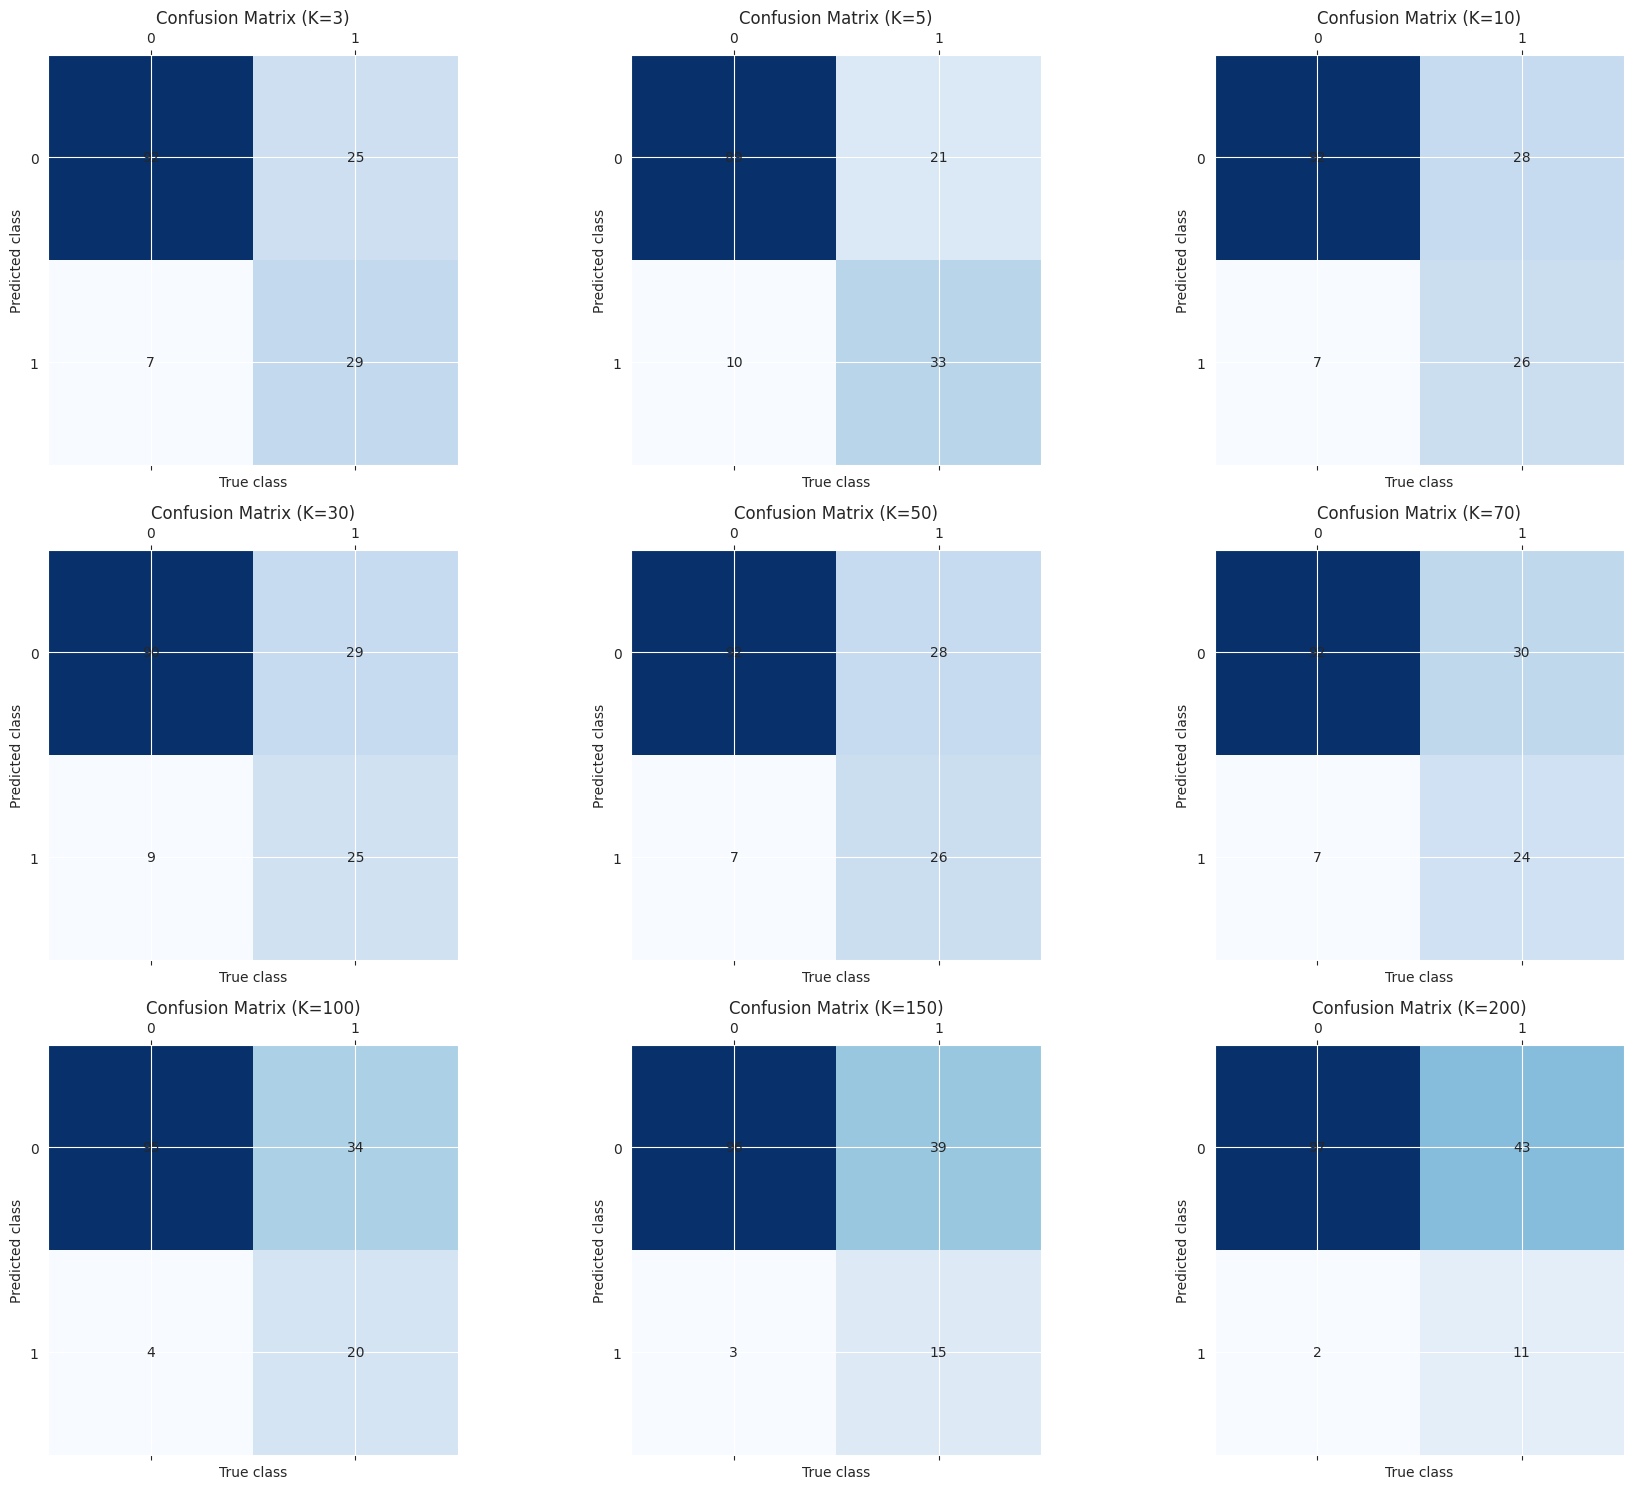

In [16]:
random.seed(42)

selected_features = random.sample(list(X.columns), random.randint(2, len(X.columns)))

new_x = X[selected_features]

display(new_x.head())

explore(new_x, Y, [3, 5, 10, 30, 50, 70, 100, 150, 200])

Исследуем модель 2: на фиксированном наборе признаков

K = 3
Accuracy: 0.7647058823529411

K = 5
Accuracy: 0.7516339869281046

K = 10
Accuracy: 0.738562091503268

K = 30
Accuracy: 0.7450980392156863

K = 50
Accuracy: 0.738562091503268

K = 70
Accuracy: 0.7516339869281046

K = 100
Accuracy: 0.738562091503268

K = 150
Accuracy: 0.7516339869281046

K = 200
Accuracy: 0.7124183006535948



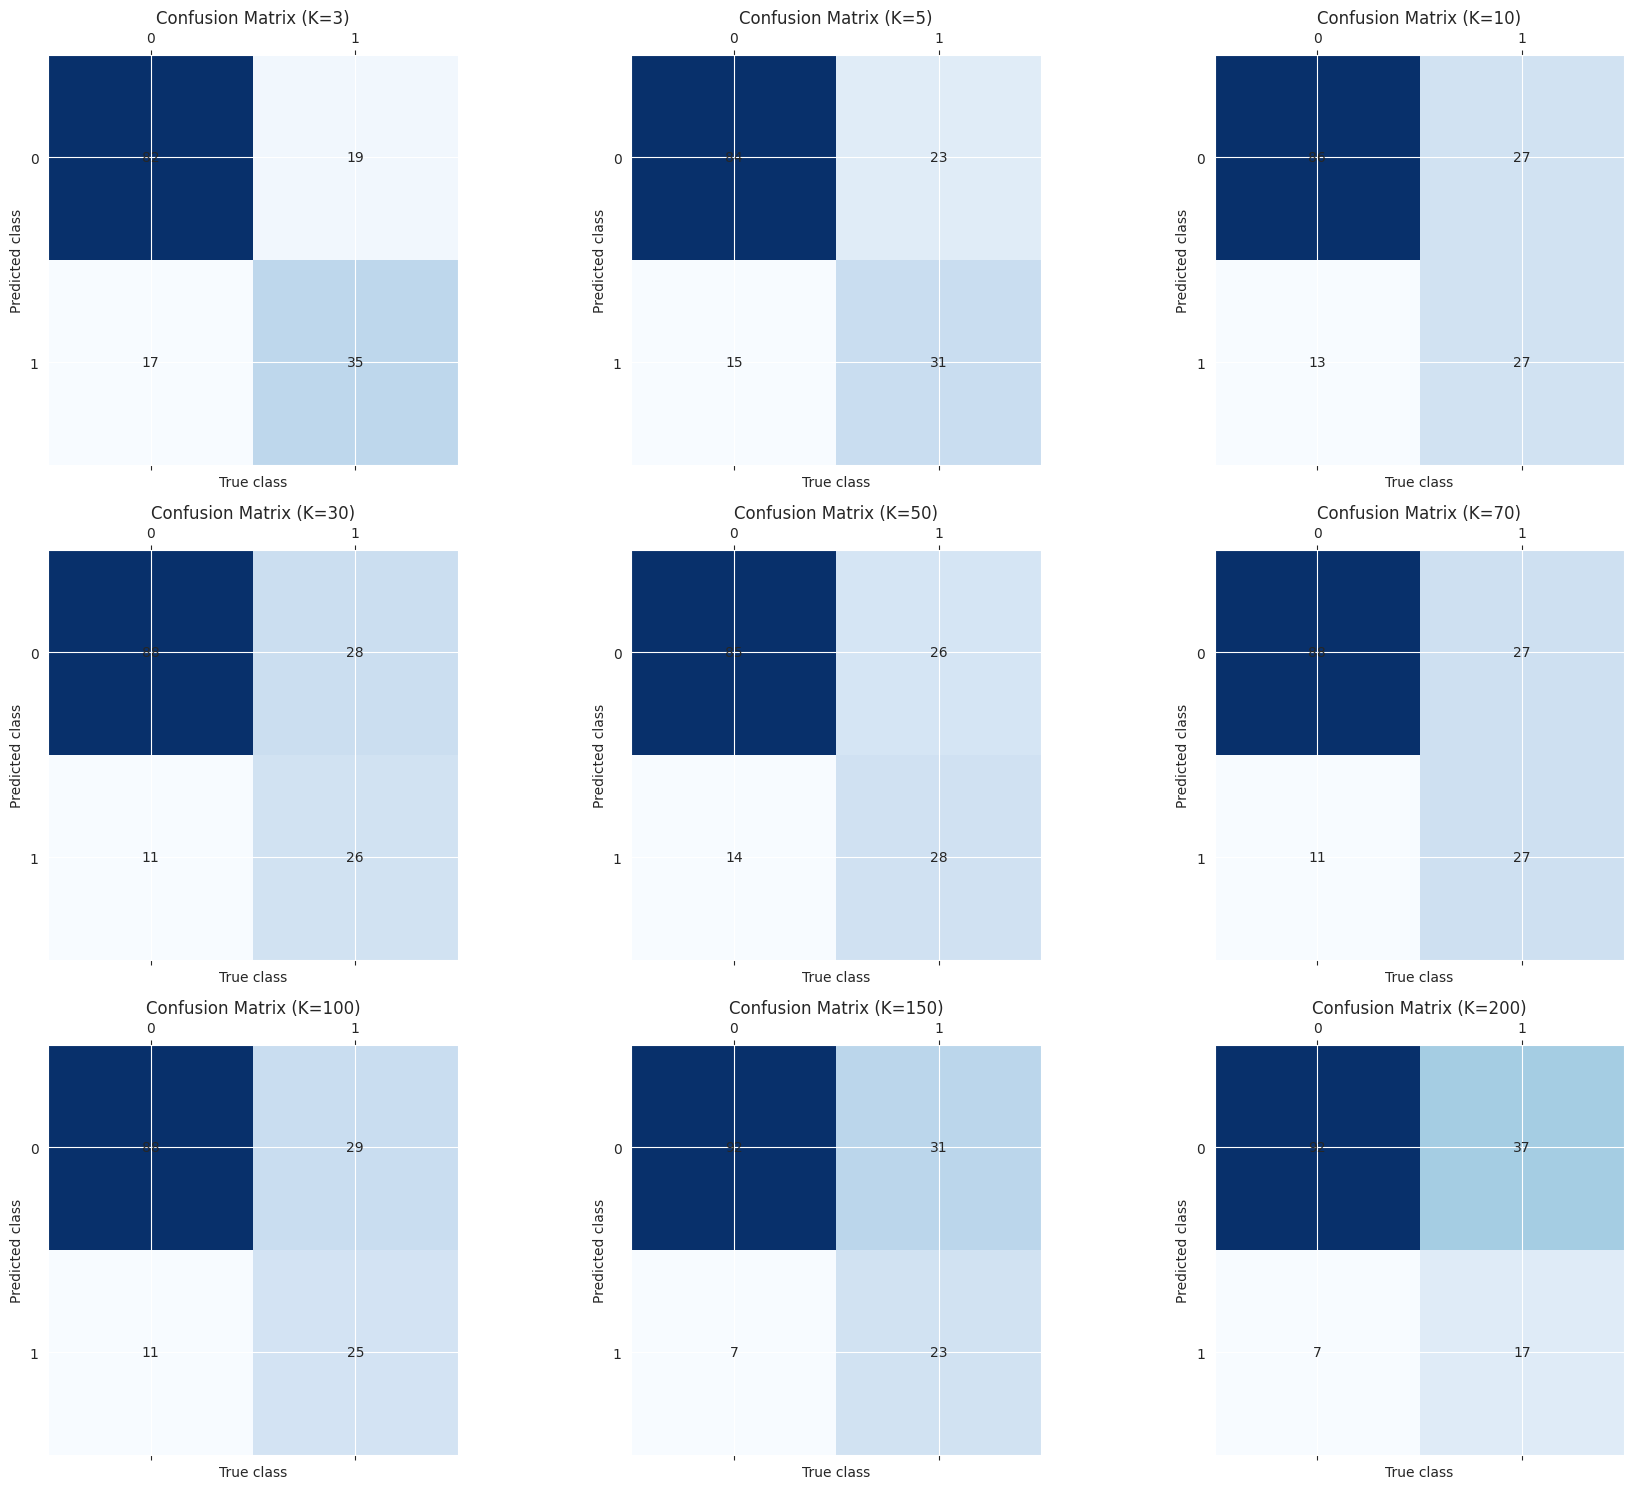

In [17]:
explore(X[['Pregnancies', 'Glucose', 'Age']], Y, [3, 5, 10, 30, 50, 70, 100, 150, 200])

Я также написал функцию которая перебирает различные наборы признаков при различных k в поисках наилучшей точности.

In [18]:
def find_best_params(X, Y, k_vals):
    best_accuracy = 0
    best_feature_subset = []
    best_matrix = []

    x_train, x_test, y_train, y_test = train_test_split(X, Y)

    for subset_size in range(2, len(X.columns) + 1):
        for subset in combinations(X.columns, subset_size):
            selected_features = list(subset)

            X_train_subset = x_train[selected_features].values
            X_test_subset = x_test[selected_features].values

            for k in k_vals:
                y_pred = [k_nearest_neighbors(X_train_subset, y_train.values, x, k) for x in X_test_subset]

                current_accuracy = accuracy_score(y_test.values, y_pred)

                if current_accuracy > best_accuracy:
                    best_accuracy = current_accuracy
                    best_feature_subset = selected_features.copy()
                    best_k = k
                    best_matrix = error_matrix(y_pred, y_test.values, 2)

    return best_accuracy, best_feature_subset, best_k, best_matrix

Запустим поиск лучшего набора параметров

In [19]:
best_accuracy, best_feature_subset, best_k, best_matrix = find_best_params(X, Y, [3, 5, 10, 30, 50, 70, 100, 150, 200])

print(f"Лучший набор признаков: {best_feature_subset}")
print(f"Лучшее значение k: {best_k}")
print(f"Лучшая точность: {best_accuracy:.4f}")
print(f"Матрица ошибок для лучшей комбинации:\n{best_matrix}")

KeyboardInterrupt: 

Получаем что наилучшая точность для заданных $k$ достигается при $k=30$ и использовании признаков: `['Glucose', 'BloodPressure', 'BMI', 'Age']`.